In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



In [2]:
#Loading  the data
df=pd.read_csv('train.csv')
df.head(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
df.drop('id', axis=1, inplace=True)

In [5]:
variables = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', ]

In [6]:
def remove_outliers_z_score(df, variable, threshold=3):
  """
  This function removes outliers from a dataframe based on the z-score.

  Args:
      df (pd.DataFrame): The dataframe containing the data.
      variable (str): The name of the variable for which outliers should be removed.
      threshold (int): The threshold for the z-score. Data points with a z-score
          greater than or less than the threshold will be considered outliers and
          removed.

  Returns:
      pd.DataFrame: The dataframe with outliers removed.
  """

  # Calculate the z-score for the variable
  z_scores = scipy.stats.zscore(df[variable])

  # Select data points within the threshold
  non_outliers = df[abs(z_scores) <= threshold]

  return non_outliers

# Remove outliers for each variable in the dataframe
for variable in variables:
  df = remove_outliers_z_score(df, variable)

# Display the updated dataframe
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,69,122,13.0,1,0.7,17,12,16,0,0


In [7]:
##Checking the distribution of the data
df.kurtosis()


age                    -0.309466
height(cm)             -0.554947
weight(kg)             -0.373075
waist(cm)              -0.251080
eyesight(left)          0.034075
eyesight(right)         0.072905
hearing(left)           0.000000
hearing(right)          0.000000
systolic               -0.157865
relaxation             -0.131522
fasting blood sugar     1.329353
Cholesterol            -0.538445
triglyceride            0.011150
HDL                    -0.112816
LDL                    -0.531501
hemoglobin             -0.342304
Urine protein          21.539563
serum creatinine       -0.254208
AST                     0.995196
ALT                     0.718051
Gtp                     2.117322
dental caries           0.282160
smoking                -1.922416
dtype: float64

In [8]:
#checking the askewness of the data
df.skew()

age                    0.195799
height(cm)            -0.261287
weight(kg)             0.242345
waist(cm)             -0.022035
eyesight(left)        -0.106812
eyesight(right)       -0.125694
hearing(left)          0.000000
hearing(right)         0.000000
systolic               0.132835
relaxation             0.102772
fasting blood sugar    0.838051
Cholesterol           -0.034890
triglyceride           0.724943
HDL                    0.657776
LDL                    0.076814
hemoglobin            -0.330271
Urine protein          4.851726
serum creatinine       0.018149
AST                    0.978203
ALT                    1.070946
Gtp                    1.458571
dental caries          1.510681
smoking                0.278589
dtype: float64

In [9]:
# Select the numerical columns to normalize
numerical_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)',  'systolic','relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

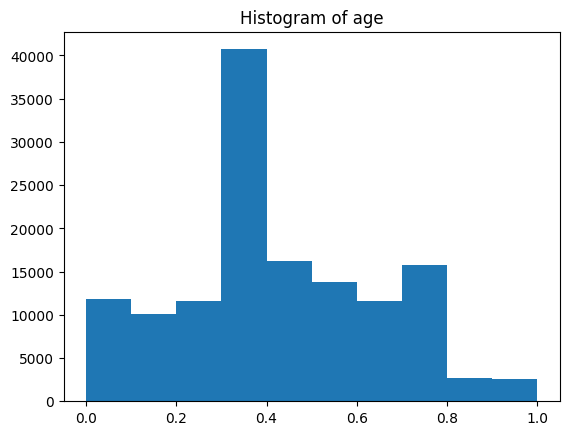

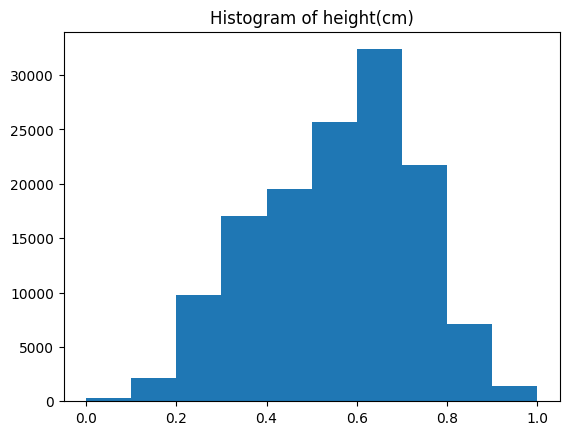

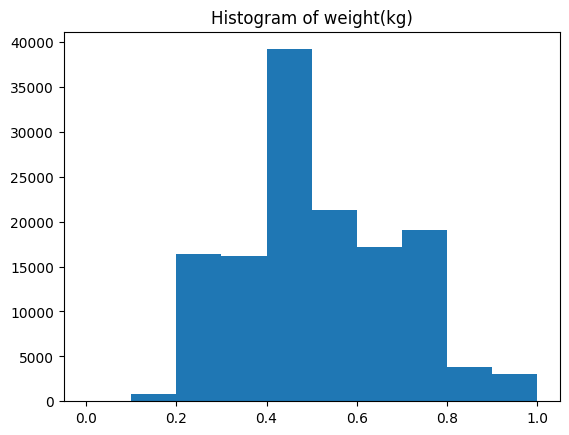

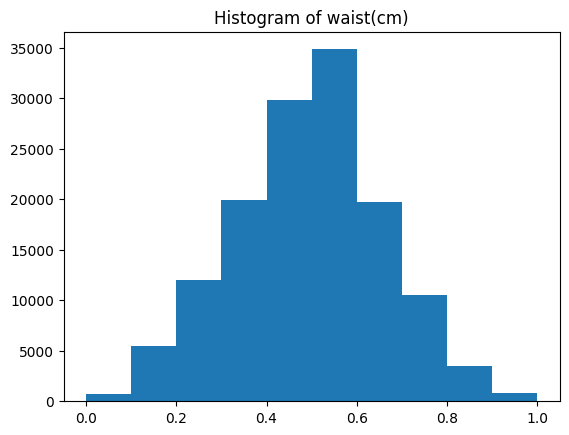

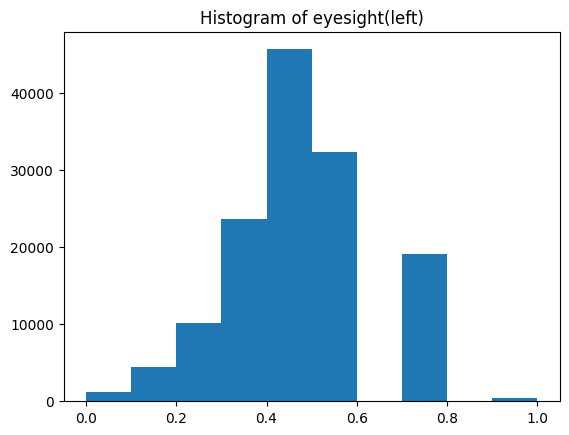

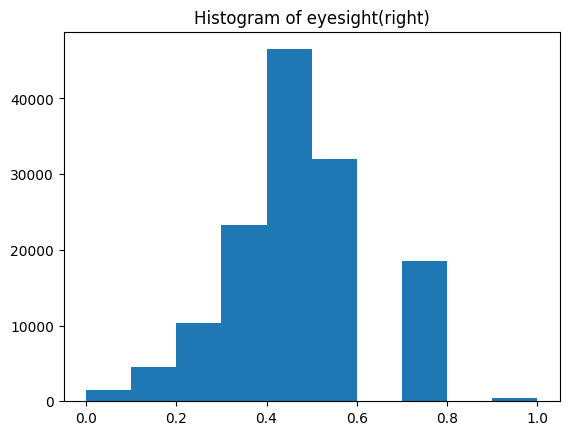

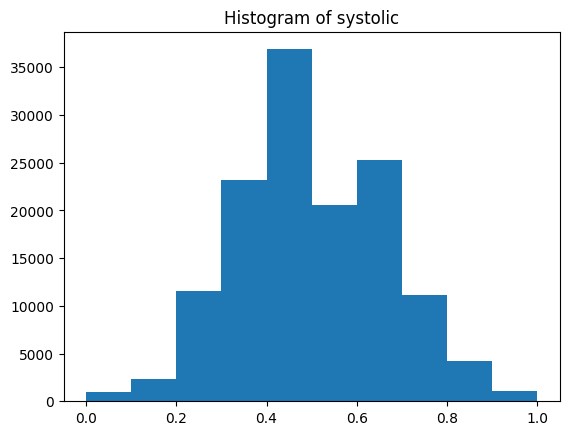

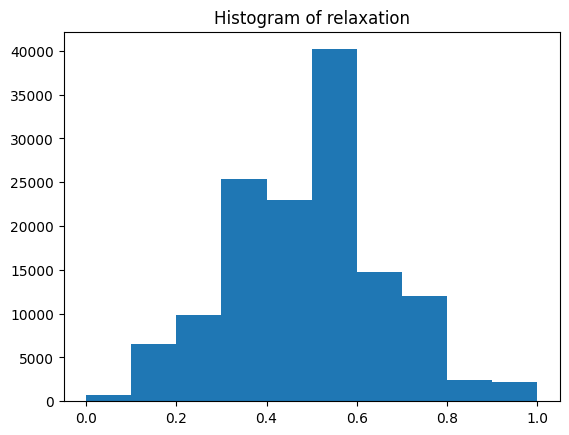

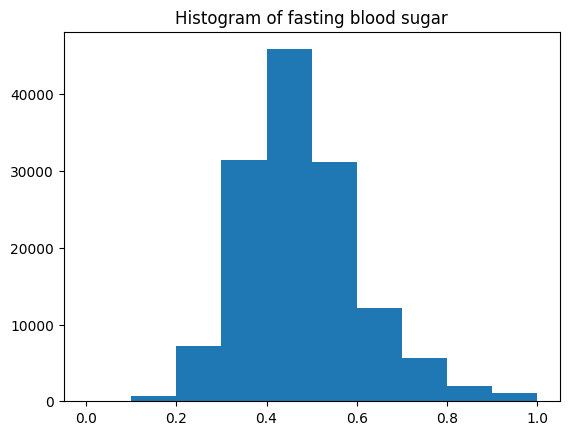

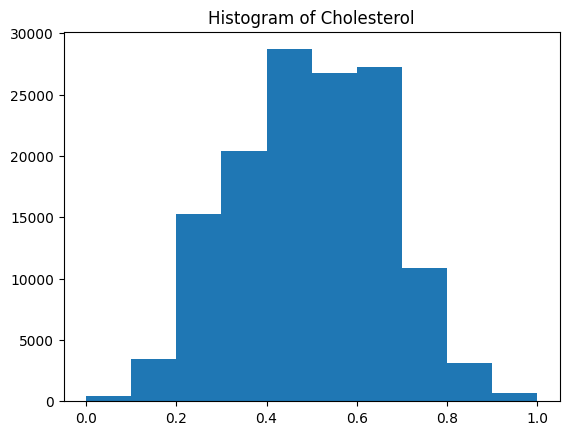

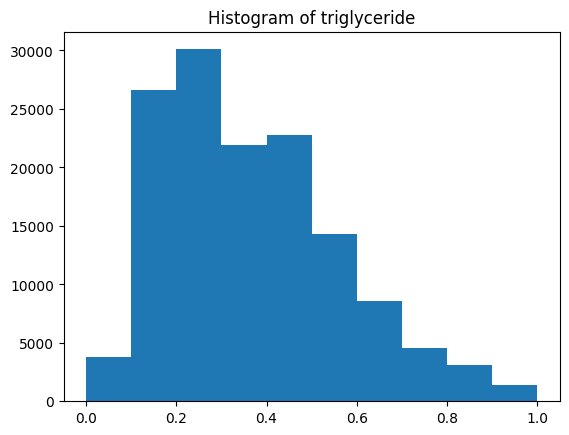

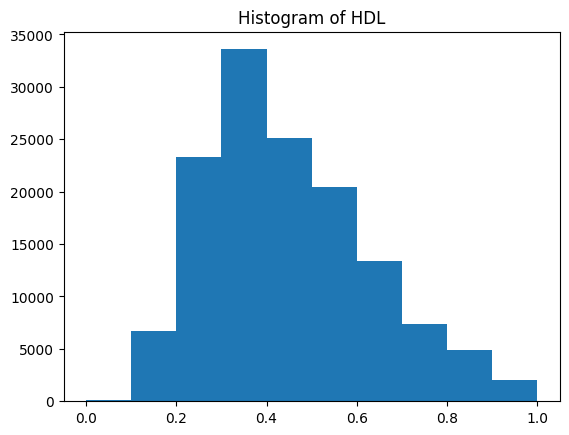

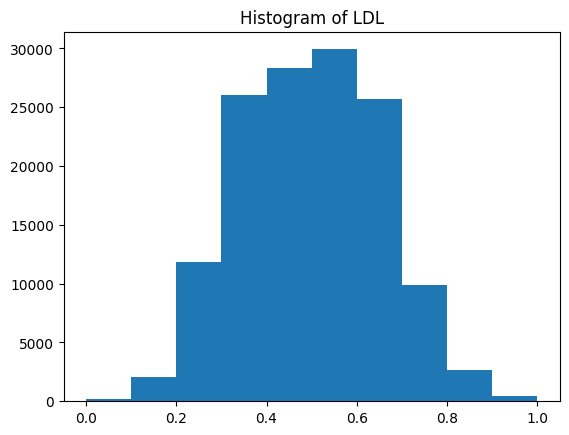

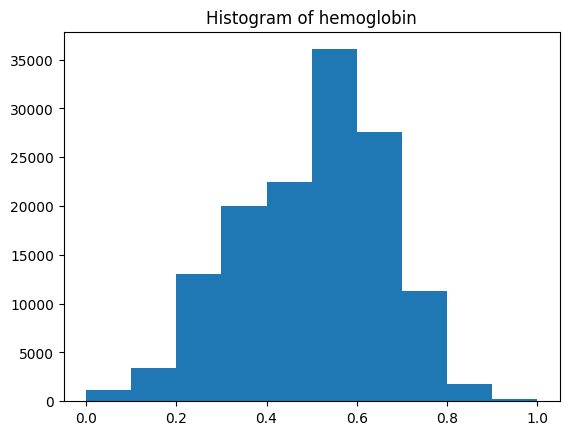

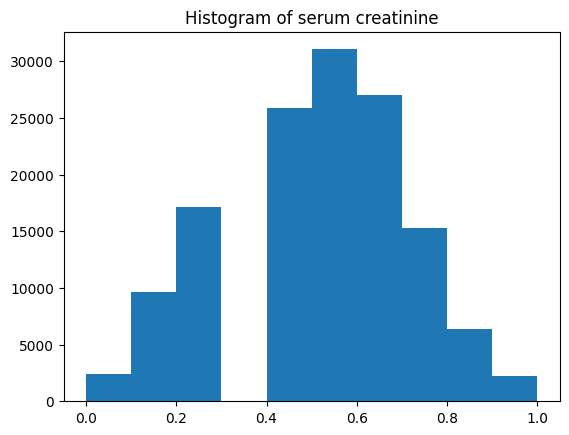

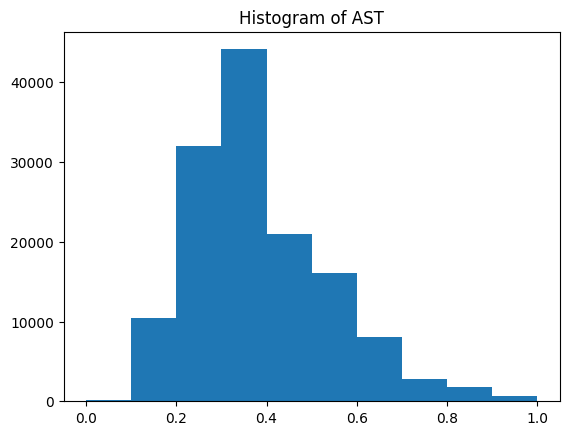

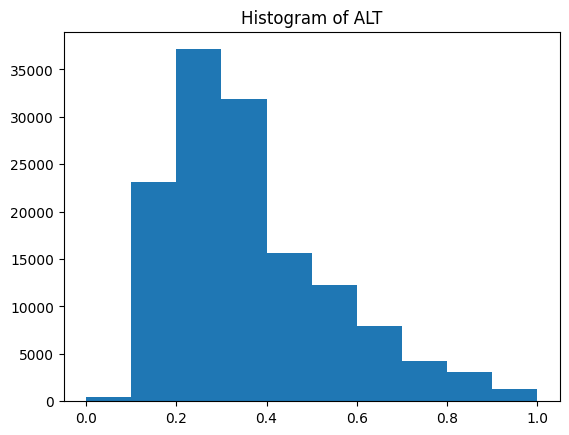

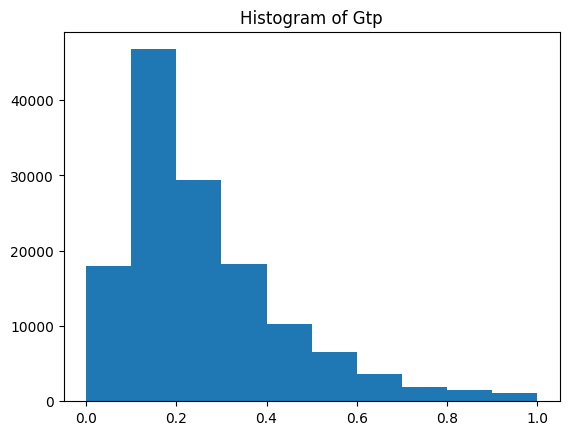

In [10]:
# Select the numerical columns to normalize
numerical_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)',  'systolic','relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp']
# Create a histogram for each numeric column
for col in numerical_cols:
    plt.hist(df[col])
    plt.title(f"Histogram of {col}")
    plt.show()